# Data Analysis

###### Importing basic libraries

In [154]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

###### Reading the data

In [155]:
data = pd.read_csv('tested.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


###### Data Exploration

In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [157]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


###### Separate the data into numeric and categorical

###### Checking for Null Values if any

In [159]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#####  Average age of each of these categories.

In [160]:
Young_M= data['Name'].str.contains('Master', regex= True, na=False)
Young_F= data['Name'].str.contains('Miss', regex= True, na=False)
Adult_M= data['Name'].str.contains('Mr\.', regex= True, na=False)
Adult_F= data['Name'].str.contains('Mrs', regex= True, na=False)

print("Mean Age for Young Males: ",data.loc[Young_M,'Age'].mean())
print("Mean Age for Young Females: ",data.loc[Young_F,'Age'].mean())
print("Mean Age for Adult Males: ",data.loc[Adult_M,'Age'].mean())
print("Mean Age for Adult Females: ",data.loc[Adult_F,'Age'].mean())

Mean Age for Young Males:  7.406470588235294
Mean Age for Young Females:  21.774843750000002
Mean Age for Adult Males:  32.0
Mean Age for Adult Females:  38.903225806451616


In [161]:
# I have used bfill method first and then ffill just to ensure that for data point 
#having no preceding non-null value, the next non-null value is filled and no data point remains null.

In [162]:
data.loc[Young_M,'Age'] = data.loc[Young_M,'Age'].fillna(data.loc[Young_M,'Age'].mean())
data.loc[Young_F,'Age'] = data.loc[Young_F,'Age'].fillna(data.loc[Young_F,'Age'].mean())
data.loc[Adult_M,'Age'] = data.loc[Adult_M,'Age'].fillna(data.loc[Adult_M,'Age'].mean())
data.loc[Adult_F,'Age'] = data.loc[Adult_F,'Age'].fillna(data.loc[Adult_F,'Age'].mean())

data=data.fillna(method="bfill")
data=data.fillna(method="ffill")

###### Checking for Null Values if any



In [163]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [158]:
data_num = data[['Age','SibSp','Parch','Fare']]
data_cat = data[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

In [164]:
data_num

,Age,SibSp,Parch,Fare
0,34.5,0,0,7.8292
1,47.0,1,0,7.0000
2,62.0,0,0,9.6875
3,27.0,0,0,8.6625
4,22.0,1,1,12.2875
...,...,...,...,...
413,NaN,0,0,8.0500
414,39.0,0,0,108.9000
415,38.5,0,0,7.2500
416,NaN,0,0,8.0500


In [44]:
data_cat

,Survived,Pclass,Sex,Ticket,Cabin,Embarked
0,0,3,male,330911,NaN,Q
1,1,3,female,363272,NaN,S
2,0,2,male,240276,NaN,Q
3,0,3,male,315154,NaN,S
4,1,3,female,3101298,NaN,S
...,...,...,...,...,...,...
413,0,3,male,A.5. 3236,NaN,S
414,1,1,female,PC 17758,C105,C
415,0,3,male,SOTON/O.Q. 3101262,NaN,S
416,0,3,male,359309,NaN,S


## Plots of all Numeric Values

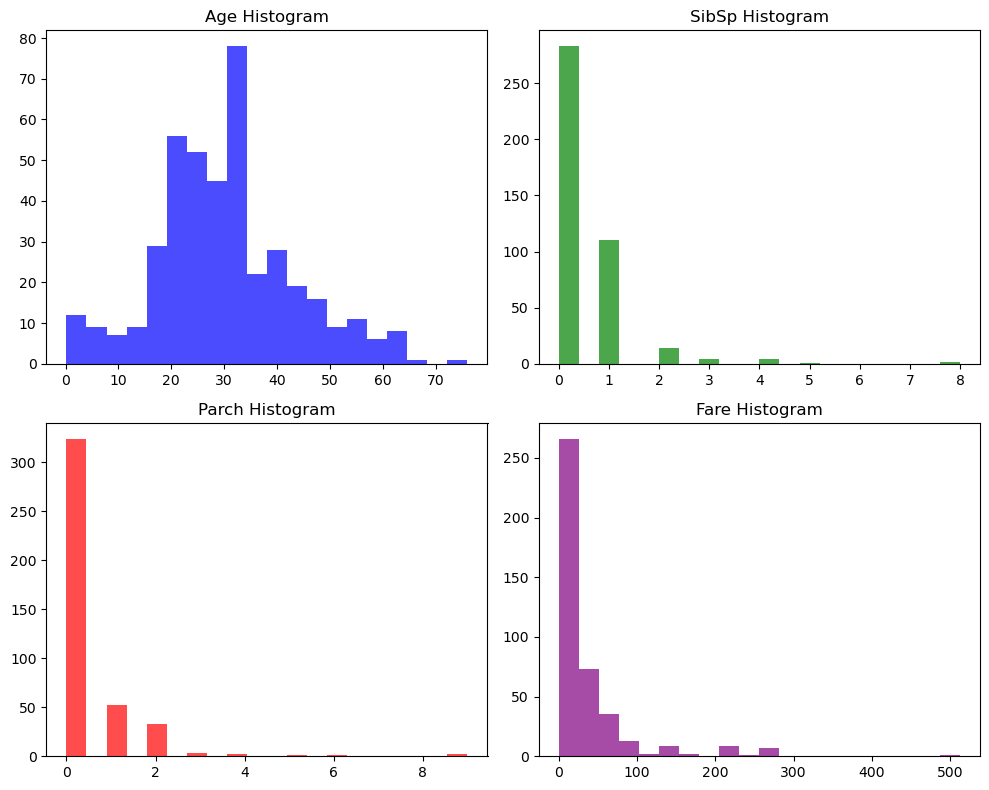

In [45]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].hist(data['Age'], bins=20, color='blue', alpha=0.7)
axs[0, 0].set_title('Age Histogram')
axs[0, 1].hist(data['SibSp'], bins=20, color='green', alpha=0.7)
axs[0, 1].set_title('SibSp Histogram')
axs[1, 0].hist(data['Parch'], bins=20, color='red', alpha=0.7)
axs[1, 0].set_title('Parch Histogram')
axs[1, 1].hist(data['Fare'], bins=20, color='purple', alpha=0.7)
axs[1, 1].set_title('Fare Histogram')
plt.tight_layout()
plt.show()

###### Heatmap between Numeric Columns

C:\Users\syedk\AppData\Local\Temp\ipykernel_7436\3933620724.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),cmap='YlGnBu')


<Axes: >

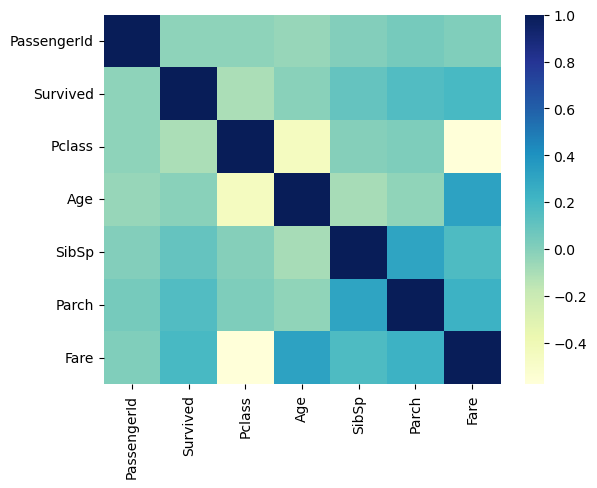

In [46]:
sns.heatmap(data.corr(),cmap='YlGnBu')

In [47]:
pd.pivot_table(data, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.299007,27.470191,0.274436,0.379699
1,29.871514,49.747699,0.598684,0.565789


The inference we can draw from this table is:  
■ The average age of survivors is 30, so young people tend to survive more.   

■People who paid higher fare rates were more likely to survive, nearest to double. This might be the people traveling in first-class. Thus the rich survived.     

■In the 3rd column, If you have parents, you had a higher chance of surviving. So the parents might’ve saved the kids before themselves, thus explaining the rates and if you are a child, and have siblings, you have less of a chance of surviving
    

###### Plots with our categorical Data

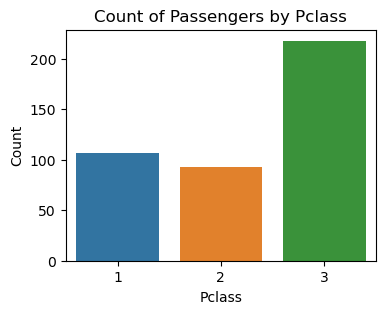

In [48]:
plt.figure(figsize=(4, 3))
sns.countplot(data=data_cat, x='Pclass')
plt.title('Count of Passengers by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

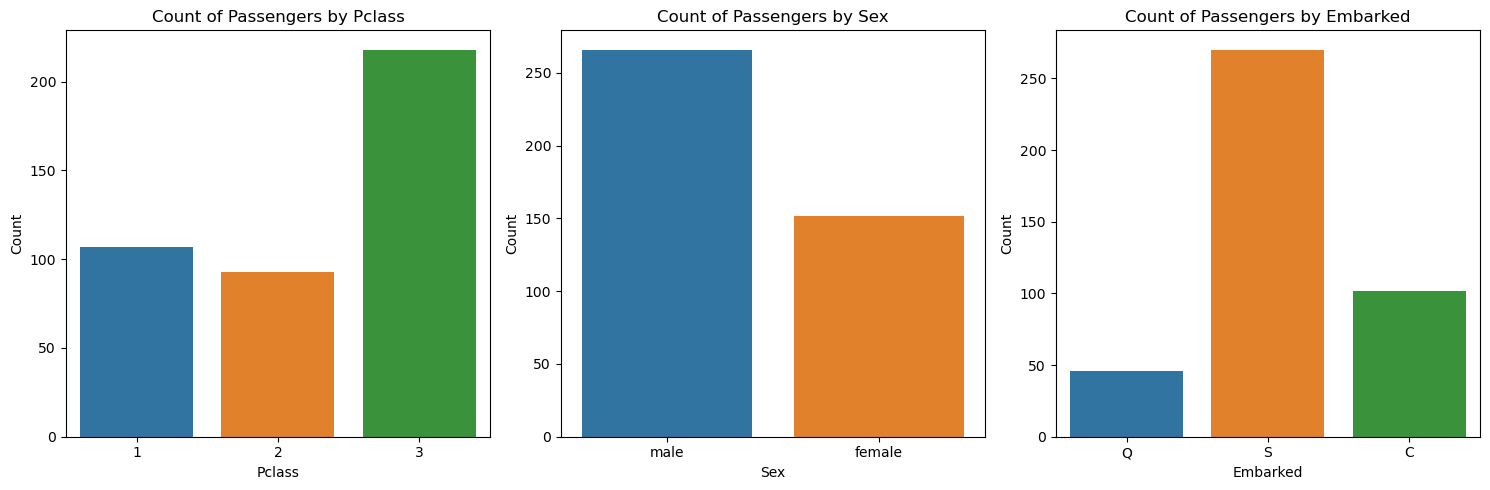

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.countplot(data=data_cat, x='Pclass')
plt.title('Count of Passengers by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.subplot(1, 3, 2)
sns.countplot(data=data_cat, x='Sex')
plt.title('Count of Passengers by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.subplot(1, 3, 3)
sns.countplot(data=data_cat, x='Embarked')
plt.title('Count of Passengers by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

we will do something similar to the pivot table above, but with our categorical variables, and compare them against our dependent variable, which is if people survived:

In [50]:
print(pd.pivot_table(data, index = 'Survived', columns = 'Pclass',
                     values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(data, index = 'Survived', columns = 'Sex', 
                     values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(data, index = 'Survived', columns = 'Embarked', 
                     values = 'Ticket' ,aggfunc ='count'))


Pclass     1   2    3
Survived             
0         57  63  146
1         50  30   72

Sex       female   male
Survived               
0            NaN  266.0
1          152.0    NaN

Embarked   C   Q    S
Survived             
0         62  22  182
1         40  24   88


★Pclass: Here we can see a lot more people survived from the First class than the Second or the Third class, even though the total number of passengers in the First class was much much less than the Third class. Thus our previous assumption that the rich survived is confirmed here, which might be relevant to model building.
 
★Sex: Most of the women survived, and the majority of the male died in the shipwreck. So it looks like the saying “Woman and children first” actually applied in this scenario.
 
★Embarked: This doesn’t seem much relevant, maybe if someone was from “Cherbourg” had a higher chance of surviving.

### Feature Engineering

Ticket and cabin data don’t really make sense to us, and this might hinder the performance of our model, so we have to simplify some of this data with feature engineering.

If we look at the actual cabin data, we see that there’s basically a letter and then a number. The letters might signify what type of cabin it is, where on the ship it is, which floor, which Class it is for, etc. And the numbers might signify the Cabin number. Let us first split them into individual cabins and see whether someone owned more than a single cabin.

In [51]:
data_cat.Cabin
data['cabin_multiple'] = data.Cabin.apply(lambda x: 0 if pd.isna(x) 
                                                    else len(x.split(' ')))
data['cabin_multiple'].value_counts()

1    340
2     39
4     26
3     13
Name: cabin_multiple, dtype: int64

It looks like the vast majority did not have individual cabins, and only a few people owned more than one cabins. Now let’s see whether the survival rates depend on this:

In [52]:
pd.pivot_table(data, index = 'Survived', columns = 'cabin_multiple',
               values = 'Ticket' ,aggfunc ='count')

cabin_multiple,1,2,3,4
Survived,,,,
0,217,24,9,16
1,123,15,4,10


Let us look at the actual letter of the cabin they were in. So we could expect that the cabins with the same letter are roughly in the same locations, or on the same floors, and logically if a cabin was near the lifeboats, they had a better chance of survival. so lets do this task:

In [53]:
# n stands for null
# in this case we will treat null values like it's own category
data['cabin_adv'] = data.Cabin.apply(lambda x: str(x)[0])
#comparing survival rates by cabin
print(data.cabin_adv.value_counts())
pd.pivot_table(data,index='Survived',columns='cabin_adv', 
                        values = 'Name', aggfunc='count')

C    155
B    117
D     45
E     44
F     29
A     25
G      3
Name: cabin_adv, dtype: int64


cabin_adv,A,B,C,D,E,F,G
Survived,,,,,,,
0,17,74,92,29,29,23,2
1,8,43,63,16,15,6,1


some future engineering on the ticket column and it did not yield many significant insights, which we don’t already know, so We’ll be skipping that part to keep the article concise. We will just divide the tickets into numeric and non-numeric for efficient usage:



In [54]:
data['numeric_ticket'] = data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
data['ticket_letters'] = data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1])
                                            .replace('.','').replace('/','')
                                            .lower() if len(x.split(' ')[:-1]) >0 else 0)

Another interesting thing we can look at is the title of individual passengers. And whether it played any role in them getting a seat in the lifeboats

In [55]:
data.Name.head(50)
data['name_title'] = data.Name.apply(lambda x: x.split(',')[1]
                                                        .split('.')[0].strip())
data['name_title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: name_title, dtype: int64

So, the ship was boarded by people of many different classes, this might be useful for us in our model.

###  Model Deployment

##### Importing Necessary Libraries

In [85]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score


###### 1) Logistic Regression Model:



In [96]:
from sklearn.preprocessing import OneHotEncoder
X_train = data[['Pclass','Age','SibSp','Parch','Fare']]
X_train = pd.concat([X_train,pd.get_dummies(data[['Sex','Embarked']])], axis=1)
print(X_train.head())
Y_train= data['Survived']

   Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  Embarked_C  \
0       3  34.5      0      0   7.8292           0         1           0   
1       3  47.0      1      0   7.0000           1         0           0   
2       2  62.0      0      0   9.6875           0         1           0   
3       3  27.0      0      0   8.6625           0         1           0   
4       3  22.0      1      1  12.2875           1         0           0   

   Embarked_Q  Embarked_S  
0           1           0  
1           0           1  
2           1           0  
3           0           1  
4           0           1  


#### Logistic Regression Model:

In [87]:
LR_survived = LogisticRegression(solver='lbfgs',max_iter=10000)
LR_survived.fit(X_train, Y_train)
LR_pred = LR_survived.predict(X_train)
LR_Accuracy = "{:.2f} %".format(LR_survived.score(X_train,Y_train)*100)
print("Accuracy",LR_Accuracy)

Accuracy 100.00 %


#### Support Vector Classifier:

In [88]:
SVC_survived = SVC()
SVC_survived.fit(X_train, Y_train)
SVC_pred = SVC_survived.predict(X_train)
SVC_Accuracy = "{:.2f} %".format(SVC_survived.score(X_train,Y_train)*100)
print("Accuracy",SVC_Accuracy)

Accuracy 65.07 %


#### K Nearest Neighbour Algorithm:¶

In [89]:
KNN_survived = KNeighborsClassifier(n_neighbors = 3)
KNN_survived.fit(X_train, Y_train)
KNN_pred = KNN_survived.predict(X_train)
KNN_Accuracy = "{:.2f} %".format(KNN_survived.score(X_train,Y_train)*100)
print("Accuracy",KNN_Accuracy)

Accuracy 87.80 %


## Summary:


Accuracy from Logistic Regression Model is 100%

Accuracy from Support Vector Classifier is 65.07 %

Accuracy from K Nearest Neighbour Algorithm Model is 87.80 %